## Visualizing results -  Original Geoparser - Fifth Edition

We have run the [Edinburgh geoparser](https://programminghistorian.org/en/lessons/geoparsing-text-with-edinburgh#patch-fix) to extract and resolvoe locations contained within the **Fifth Edition, Encyclopaedia Britannica**. 
                             
The query for running that we have used is the following: 

`spark-submit --py-files defoe.zip defoe/run_query.py nls_fifth_edition nls defoe.nls.queries.geoparser_pages -r geoparser_original_EB_fifth_edition -n 16`



### Loading the necessary libraries

In [1]:
import yaml
from IPython.core.display import display, HTML
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

### Functions

In [2]:
def read_query_results(filename):
    with open('./results_NLS/'+filename, 'r') as f:
        query_results = yaml.load(f)
    return query_results


In [3]:
def geresolution_dataframe(result):
    dfs=[]
    data=[]
    c_locs=[]
    for i in result.keys():
        t_ind = 0
        e_ind = 0
        for k in result[i]:
            locs= k["georesolution_page"]
            page = k["text_unit id"]
       
            if locs != {}:
                data=[]
                l_ind = 0
                for i in locs:
                    if type(locs[i]) == type([]) :
                        c_locs=locs[i].copy()
                        c_locs.append(i.split("-")[0])
                        c_locs.append(page)
                        data.append(c_locs)
                        l_ind = l_ind + 1   
                e_ind = t_ind + l_ind 
                if data:
                    df_page = pd.DataFrame(data, columns = ['Latitude', 'Longitude', 'Place', 'Page'], 
                                      index=list(range(t_ind, e_ind)))
                    dfs.append(df_page)
                    t_ind=e_ind
    df_total = pd.concat(dfs)
    return df_total

In [4]:
def get_place(df, lat, long):
    df_new=df.loc[(df['Latitude'] == lat) & (df_total['Longitude'] == long)]['Place']
    return df_new.count(), df_new.iloc[0]

In [5]:
def label_freq_places(df_total, df_max_geolocations, filter_list):
    place_label=[]
    place_freq = []
    i_limit = 15
    i =0
    k =0 
    while k < i_limit:
        place_count, place_name = get_place(df_total, df_max_geolocations.iloc[i]['Latitude'], df_max_geolocations.iloc[i]['Longitude'])
        if place_name not in filter_list:
            print(i, place_count,place_name)
            if place_name not in place_label:
                k = k + 1
            place_label.append(place_name)
            place_freq.append(place_count)
         
        i = i + 1
    return place_label, place_freq

In [6]:
def plot_bar_places(df_group_places):
    # this is for plotting purpose
    index = np.arange(len(df_group_places['place_label']))
    plt.bar(index, df_group_places['count'], color='orange')
    plt.xlabel('Places')
    plt.ylabel('Frequency of Places')
    plt.xticks(index, df_group_places['place_label'], rotation=40, fontsize=8)
    plt.title('15 Places most mentioned in the using the Original Geoparser')

### Information about the defoe geoparser query

This query does the following tasks:

- Ingests all the pages indicated in the query
- Cleans the text applied two fixes: Long-s and hyphen words
- Identifies *entities* using the original geotagging of the Edinburgh geoparser. 
- From the previous entities, just selects the one about *location* and creates an xml (in memory) per page with these "location" entities. 
- Applies the georesolve of the Edinburgh geoparser to each xml and gets lat and long. **Important: Everything is in memory, we do not create XML files in those steps**
- Group the results by Book's title, and also gets some informative metadata

As a result we get a file per book with an entry per page with the following information:

    * edition: Edition of the gazetteer
    * georesolution_page: Page's geolocations after applying the georesolver
    * page_filename: Page's filename (page's relative path)
    * text_unit id: The number of this page (e.g. Page 1)
    * lang_model : The language model applied (original_geoparser)
    * type_distribution: type of document (newspaper|book). In this case is "book". 
    * year: Publication year 


In [8]:
results=read_query_results('geoparser_original_EB_fifth_edition')

In [15]:
df_total= geresolution_dataframe(results)

In [16]:
df_total[["Place"]].count()

Place    194304
dtype: int64

In [24]:
df_total["Place"]= df_total["Place"].str.capitalize()

In [25]:
df_total.groupby("Place").count()

,Latitude,Longitude,Page
Place,,,
A ward,1,1,1
Aa,1,1,1
Aach,1,1,1
Aalen,1,1,1
Aam,1,1,1
Aan,1,1,1
Aar,10,10,10
Aaron hill,4,4,4
Aas,1,1,1


In [26]:
df_filter = df_total[['Latitude','Longitude']].groupby(['Latitude', 'Longitude'])['Longitude'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)   

df_max_geolocations = df_filter.drop(0)

df_max_geolocations.head(15)


,Latitude,Longitude,count
16390,43.2256251,-75.48878740000001,2080
6965,34.6120507,-82.765139,1903
10105,38.7937266,-77.8577722,1531
19234,45.8833333,18.1666667,1516
15703,42.7578673,-71.2422828,1144
18527,45.2535999,-86.9795592,1108
23140,50.6391735835358,3.07591438293457,1102
25016,52.16045,-0.70312,1084
10238,38.8873341,-77.05553279999999,1037
21886,49.012779,2.55,891


In [27]:
#Getting the 15 places (and their frequencies) most mentioned
filter_list=['Jupiter', 'Venus, a d p', 'Saturn', 'Avas']
place_label, place_freq = label_freq_places(df_total, df_max_geolocations, filter_list)
    

0 2080 Rome
1 1903 City of france
2 1531 England
4 1144 England
5 1108 Europe
6 1102 Europe
7 1084 England
8 1037 Scotland
9 891 Paris
10 886 Italy
11 843 America
12 841 Asia
13 826 England
14 818 France
15 792 Great britain
16 772 Oxford
17 764 Rome
18 749 England
19 715 Edinburgh
20 683 France
21 669 Scotland
22 622 Germany
23 577 Venice


In [28]:
#Visualizing the 15 places in a Bar plot
df_places = {'place_label':place_label,'place_freq':place_freq}
df_places_freq = pd.DataFrame(df_places)
df_group_places = df_places_freq.groupby(['place_label'])['place_freq'].sum()\
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)   


df_group_places

,place_label,count
4,England,5334
12,Rome,2844
5,Europe,2210
2,City of france,1903
13,Scotland,1706
6,France,1501
11,Paris,891
9,Italy,886
0,America,843
1,Asia,841


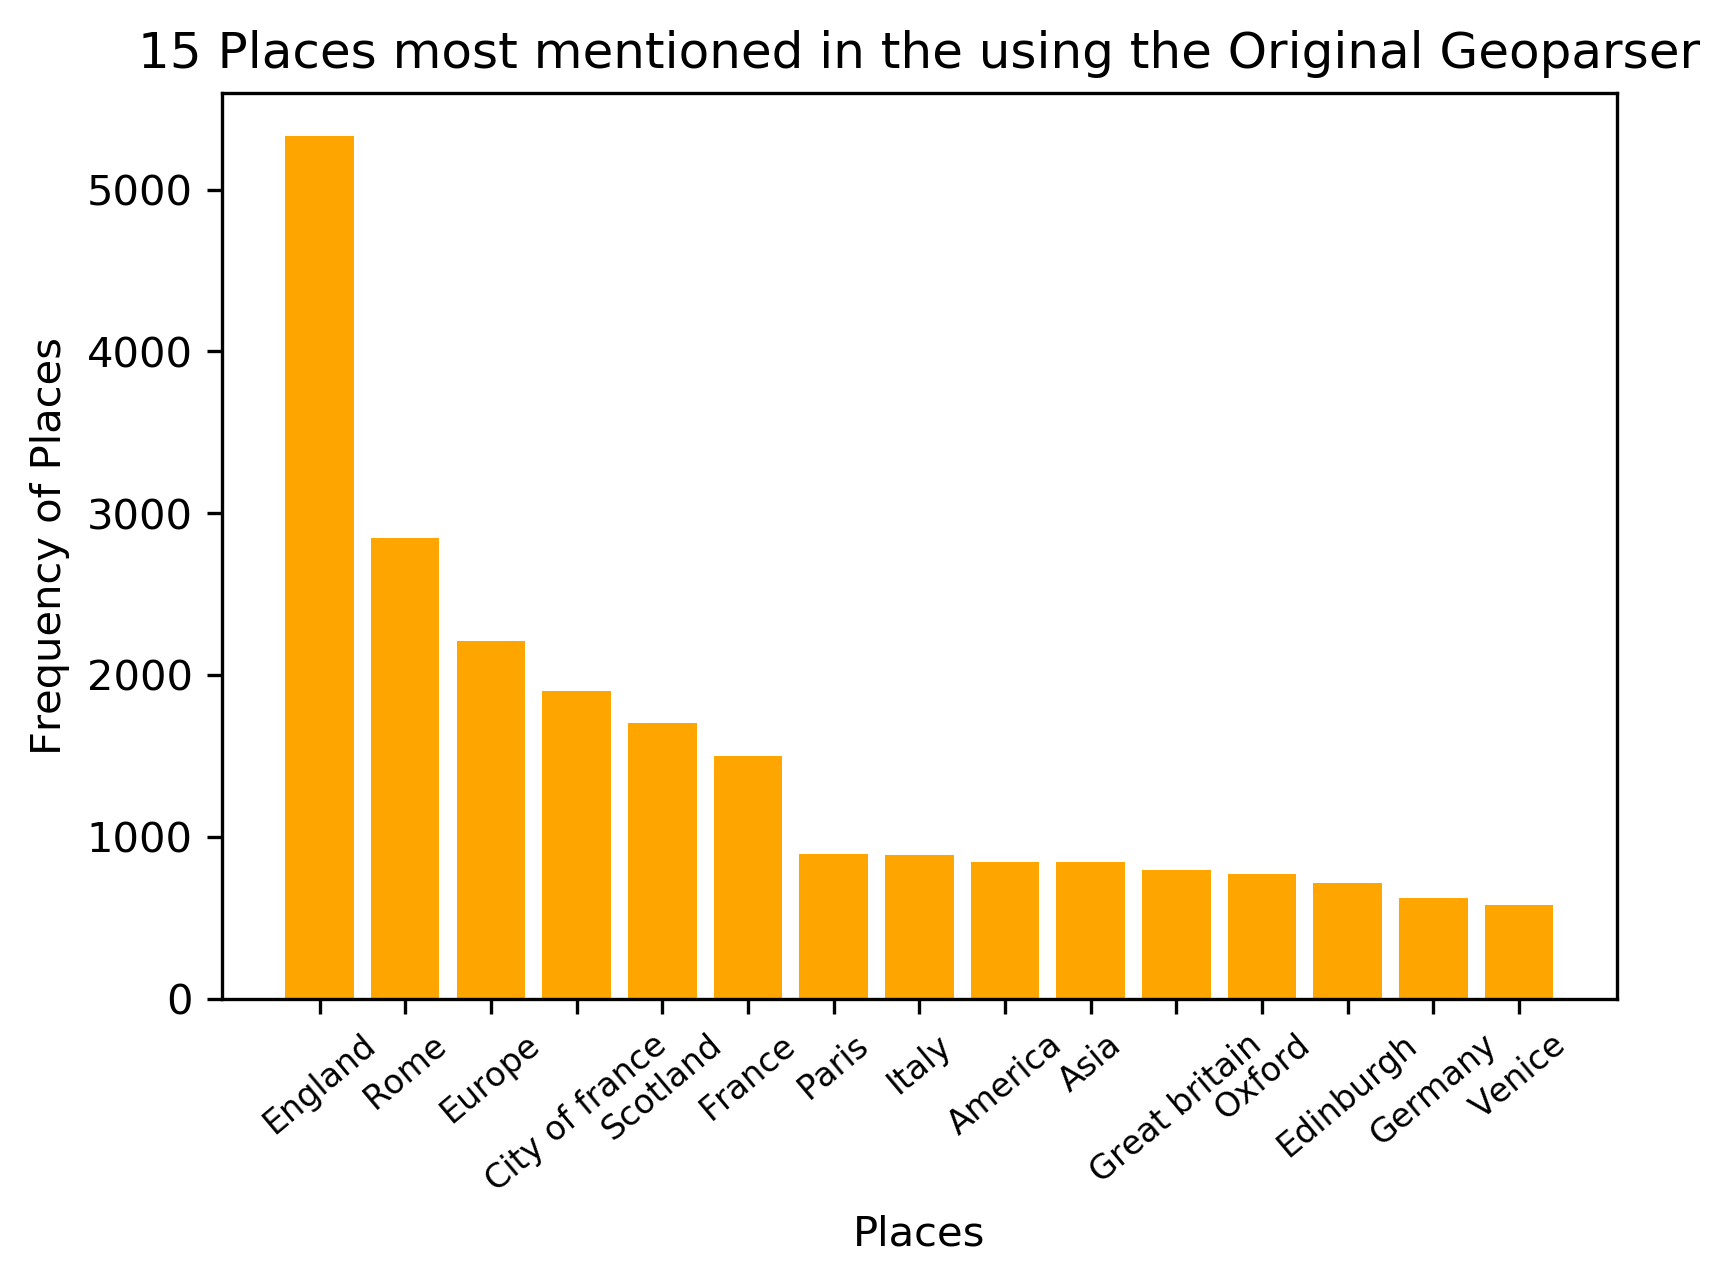

In [29]:
mpl.rcParams['figure.dpi']=300
plot_bar_places(df_group_places)